# Analysis of Hypothetical Census Data

<b>Introduction:</b>
This notebook will consist of 4 seperate parts:<br>
-Reading in the data file<br>
-Cleaning the data and ensuring that it is usable<br>
-Visualizing the data so that it can be understood easier and used in both the presentation and the report<br>
-Analysing the data and making predictions on what is expected within the data<br>

First libraries will be imported for use in the project 

In [1]:
import pandas as pd
import seaborn as sns
import itertools 
from word2number import w2n 

## Step One - Reading in the data file:
Here the file is read in using pandas and assigned to a variable so that changes are not being made to the file and there is no unecassary opening and closing of the file. 

In [2]:
censusData = pd.read_csv('CensusN5.csv')

## Step Two - Cleaning the Data
This part consists of multiple steps to ensure that the data is usable and valid and there are no misisng values in any of the data. 

It makes sense to first check how many missing values are in the data, so it can be understood what needs to be done.

In [3]:
#Find any columns with missing and null values, this also includes any filled with NA so this will need to be changed
columsWMissing = censusData.columns[censusData.isnull().any()]
censusData[columsWMissing].isnull().sum()

Surname              6
Marital Status    1910
Religion          2120
dtype: int64

The above cell outputs Surname - 6, Marital Status - 1910, Religion - 2120<br>
Further checks will need to be done on Marital Status and Religion as N/A is a valid answer for this column, so it needs to be checked for values that are incorrect and not N/A. 
NA is not valid for Surname so this can be looked at and resolved first. 

<b>Correcting Surnames</b>

In [4]:
#Show the records with the missing surname
censusData[censusData['Surname'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3375,19,Dolphin Road,Brett Ford,NaN,24,Partner,Single,Male,Legal secretary,None,Septheism
4110,7,February Ridge,Joyce Frost,NaN,96,Head,Married,Female,"Retired Conservator, museum/gallery",None,Triangulism
4111,7,February Ridge,Ashley Frost,NaN,93,Husband,Married,Male,Retired Advertising account planner,None,None
4540,8,Landings Road,Lydia Parry,NaN,25,None,Single,Female,"Biochemist, clinical",None,Intramystical
6068,70,Lisbonbraid Street,Frances Smith,NaN,73,Head,Widowed,Female,Retired General practice doctor,None,Utheism
7707,2,Truro Common,Henry Harding,NaN,83,Head,Widowed,Male,"Retired Teacher, adult education",None,None


Because the surname is in the first name box it is just a case of splitting the string in that column into two parts, storing it in a list and then putting the correct part of the split name into the respective column. 

In [5]:
for index, rows in enumerate(censusData[censusData['Surname'].isnull()].iterrows()): #Iterate through
    splitNames = rows[1]['First Name'].split() #Split the string in first names
    savedIndex = rows[0]
    censusData['First Name'].iloc[savedIndex] = splitNames[0] #Update the value of first name at the first index of incorrect
    censusData['Surname'].iloc[savedIndex] = splitNames[1] #Update the surname

<b>Class for converting to the correct data types</b>

Contains functions for converting data to an int, float, string and to lower case

In [6]:
class conversion():
    def convertToInt(dataFrame, columnName):
        for i in range(len(dataFrame)):
            try:
                #Try and cast to an int
                dataFrame[columnName][i] = int(dataFrame[columnName][i])
            except:
                #if it fails show the row it has failed on so a decision can be made on what to do with it 
                problematicRows.append(i)
                print(f'ERROR IN DATA ON ROW: {i}')
                print(f'PROBLEMATIC ROW IS: \n {dataFrame.iloc[i]}')
                
                #Check for first and last item in dataframe so not trying to check out of index range
                if i == len(dataFrame) -1:
                    print(f'NO ROW AFTER THIS, ROW BEFORE IS: \n {dataFrame.iloc[i-1]}')
                if i == 0:
                    print(f'NO ROW BEFORE, ROW AFTER IS: \n {dataFrame.iloc[i+1]}')
                else: 
                    print(f'ROW BEFORE IS: \n {dataFrame.iloc[i-1]}')
                    print(f'ROW AFTER IS: \n {dataFrame.iloc[i+1]}')
        return problematicRows #In case it is need to delete rows or manually update them

    #Try to convert to a float
    def convertToFloat(dataFrame, columnName):
        for i in range(len(dataFrame)):
            try:
                dataFrame[columnName][i] = float(dataFrame[columnName][i])
            except:
                problematicRows.append(i)
                print(dataFrame.iloc[i])
        print(f'NUMBER OF ERRORS: {len(problematicRows)}')
        return problematicRows
    
    #try to convert to a string
    def convertToString(dataFrame, columnName):
        for i in range (len(dataFrame)):
            try:
                dataFrame[columnName][i] = str(dataFrame[columnName][i])
            except: 
                problematicRows.append(i)
        print(f'NUMBER OF ERRORS: {len(problematicRows)}')
        return problematicRows
    
    #Convert to Lower
    def convertToLower(dataFrame, columnName):
        for i in range(len(dataFrame)):
            dataFrame[columnName][i] = dataFrame[columnName][i].lower()

<b>House Numbers</b>

In [7]:
#Try and convert the house numbers to also check for missing values
problematicRows = []
conversion.convertToInt(censusData, 'House Number')

ERROR IN DATA ON ROW: 6573
PROBLEMATIC ROW IS: 
 House Number                                     
Street                              Cancer Avenue
First Name                                   Lucy
Surname                                      John
Age                                            65
Relationship to Head of House                Head
Marital Status                            Married
Gender                                     Female
Occupation                       Marine scientist
Infirmity                                    None
Religion                              Triangulism
Name: 6573, dtype: object
ROW BEFORE IS: 
 House Number                                     29
Street                                Cancer Avenue
First Name                                  Gillian
Surname                                      Holmes
Age                                              20
Relationship to Head of House                  Head
Marital Status                               S

[6573, 6940]

Because there are only are only two people with no house number, from looking at the data records before and after they can be corrected manually.

In [8]:
#Check the indexes of the missing values
print(problematicRows)
#Correct the missing values
censusData['House Number'][problematicRows[0]] = '30'
censusData['House Number'][problematicRows[1]] = '57'
problematicRows = []
#Empty problematic rows as done using it for this purpose 
#Try and convert it again to check that the errors have been resolved and to convert the inserted values
conversion.convertToInt(censusData, 'House Number')

[6573, 6940]


[]

<b>Ages</b>

In [9]:
#Try and convert the ages to a float
problematicRows = []
problematicRows = conversion.convertToFloat(censusData,'Age')
for i in range(len(problematicRows)):
    print(censusData.iloc[problematicRows[i]])
    #brings up 3 errors that have text as the age instead of a numeric value 
    #use w2n to convert the ages as words to numberic
    censusData['Age'][problematicRows[i]] = w2n.word_to_num(censusData['Age'][problematicRows[i]])

House Number                                  39
Street                           Collins Prairie
First Name                              Clifford
Surname                                     Hill
Age                                        Seven
Relationship to Head of House                Son
Marital Status                               NaN
Gender                                      Male
Occupation                               Student
Infirmity                                   None
Religion                                     NaN
Name: 237, dtype: object
House Number                                    17
Street                           Henderson Mission
First Name                                 Dorothy
Surname                                      Davis
Age                                           Zero
Relationship to Head of House             Daughter
Marital Status                                 NaN
Gender                                      Female
Occupation                  

In [10]:
#try and convert again to check the correction has worked
problematicRows = []
conversion.convertToFloat(censusData, 'Age')
#Check age in sensible range
censusData[censusData['Age']>=120]
censusData[censusData['Age']< 0]

NUMBER OF ERRORS: 0


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


<b>Marital Status</b>

['Single' 'Not Applicable' 'Married' 'Divorced' 'Widowed' "Don't Ask"
 'Div-orced']
1
0    Single
dtype: object
['Single' 'Not Applicable' 'Married' 'Divorced' 'Widowed']


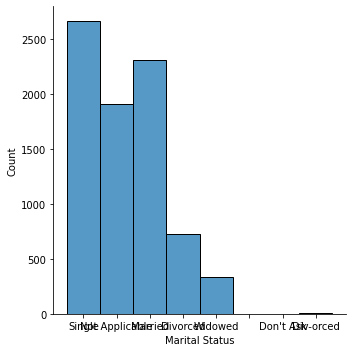

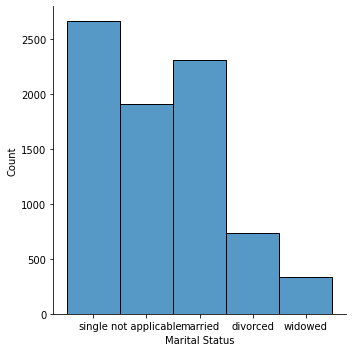

In [11]:
#Fill NA values with Not Applicable so they are not read as NaN by python
censusData['Marital Status'].fillna("Not Applicable", inplace = True)
#Create a Before graph for presentation 
maritalBefore = sns.displot(censusData, x = 'Marital Status')
maritalBefore.savefig('./MaritalStatusBefore.png')

#Check for empty strings
censusData[censusData['Marital Status'] =='']
censusData[censusData['Marital Status'] ==' ']
#There are 2 people who have filled Marital Status with a blank space

#Updating them to 'Not Applicable' as if they didn't fill it out then it is not applicable
#This seems like a reasonable step as they should have been caught earlier by the .fillna
censusData['Marital Status'][1032] = 'Not Applicable'
censusData['Marital Status'][2309] = 'Not Applicable'

#Next check if everyone under the age of 16 has not applicable as their marital status
maritalStatusNotNA = censusData[~censusData['Marital Status'].str.contains('Not Applicable')]
maritalStatusNotNA[maritalStatusNotNA['Age'] < 16]

#Check that the marital status' are reasonable
print(censusData['Marital Status'].unique()) #Don't Ask, and Div-orced need dealing with

#Correct MaritalStatus 
censusData['Marital Status'].replace('Div-orced', 'Divorced', inplace = True)
#Only one person has don't ask
count = censusData['Marital Status'] == "Don't Ask"
print(count.sum())
#Replace it with the most common occuring status
print(censusData['Marital Status'].mode())
censusData['Marital Status'].replace("Don't Ask", 'Single', inplace = True)
#Check if correct
print(censusData['Marital Status'].unique())
conversion.convertToLower(censusData, 'Marital Status')

maritalAfter = sns.displot(censusData, x = 'Marital Status')
maritalAfter.savefig('./MaritalStatusAfter.png')



<b>Gender</b>

In [12]:
#convert to lower case to avoid issues with Male MALE male and whatnot
conversion.convertToLower(censusData, 'Gender')

#Now check if any data is missing from the Gender column
censusData[~censusData['Gender'].str.contains('male|female')]

#Relationship to head of house on record with no gender is son so can assume male
censusData['Gender'][1881] = 'male'
censusData.iloc[1881] #Check that is corrected
#Looks good, convert the column to string now
conversion.convertToString(censusData, 'Gender')

#Check the unique values are reasonable
print(censusData['Gender'].unique()) #fe-male needs dealing with

#Correct values with fe-male
censusData['Gender'].replace('fe-male', 'female', inplace = True)
#Check correct
print(censusData['Gender'].unique())


NUMBER OF ERRORS: 0
['male' 'female' 'fe-male']
['male' 'female']


<b>Religion</b>

In [13]:
#Corrct NA Values to Not Applicable as reasonable answer
censusData['Religion'].fillna("Not Applicable", inplace = True) #Correct the prev missing values.
#Check for blank spaces
censusData[censusData['Religion'] == ' ']
#Check unique values for religion are reasonable
print(censusData['Religion'].unique())
#Convert to lower
conversion.convertToLower(censusData, 'Religion')
#Washer, housekeeper and NopeNope could be religions but unlikely. 

#How many of each of these?
washer = censusData['Religion'] == 'washer'
print(washer.sum())
#This wasnt a case of putting profession in religion, may be a lesser practiced religion?
housekeeper = censusData['Religion'] == 'housekeeper'
print(housekeeper.sum())
#Check the record
nope = censusData['Religion'] == 'nopenope'
print(nope.sum())

#It seems like the best options here are to use most occuring or Not Applicable 
#If they are going to fill it out with silly values then its likely religion is not applicable
censusData['Religion'].replace("washer", 'not applicable', inplace = True)
censusData['Religion'].replace("housekeeper", 'not applicable', inplace = True)
censusData['Religion'].replace("nopenope", 'not applicable', inplace = True)
print(censusData['Religion'].unique())

['Intramystical' 'Not Applicable' 'None' 'Utheism' 'Triangulism'
 'Septheism' 'Bioflow' 'Convergeance' 'Washer' 'Housekeeper' 'Nopenope']
1
2
1
['intramystical' 'not applicable' 'none' 'utheism' 'triangulism'
 'septheism' 'bioflow' 'convergeance']


<b>Infirmity</b>

In [14]:
#Fill missing values for Infirmity with Not Specified 
censusData['Infirmity'].replace(' ', 'Not Specified', inplace = True)
#Check for blank space
censusData[censusData['Infirmity'] == ' ']
#Check reasonable values
print(censusData['Infirmity'].unique())
#Check how many silly and Toothache
silly = censusData['Infirmity'] == 'Silly'
toothache = censusData['Infirmity'] == 'Toothache'
print(silly.sum())
print(toothache.sum())
#Multiple people have these issues, so they may be reasonable, will leave alone
#Convert to lower
conversion.convertToLower(censusData, 'Infirmity')

['None' 'Nudisease' 'Skygazer' 'Not Specified' 'Silly' 'Toothache']
3
2


<b>Relationship to Head of House</b>

In [15]:
#Check for reasonable answers
print(censusData['Relationship to Head of House'].unique()) 
#Hus-band needs dealing with
censusData['Relationship to Head of House'].replace("Hus-band", 'Husband', inplace = True)
print(censusData['Relationship to Head of House'].unique()) 
#Convert to lower
conversion.convertToLower(censusData, 'Relationship to Head of House')
#Check for blank space
censusData[censusData['Relationship to Head of House'] == ' ']


['Head' 'Daughter' 'Husband' 'Son' 'None' 'Partner' 'Adopted Son' 'Lodger'
 'Wife' 'Granddaughter' 'Grandson' 'Visitor' 'Cousin' 'Son-in-law'
 'Adopted Daughter' 'Step-Daughter' 'Sibling' 'Step-Son' 'Nephew' 'Neice'
 ' ' 'Adopted Granddaughter' 'Daughter-in-law' 'Hus-band']
['Head' 'Daughter' 'Husband' 'Son' 'None' 'Partner' 'Adopted Son' 'Lodger'
 'Wife' 'Granddaughter' 'Grandson' 'Visitor' 'Cousin' 'Son-in-law'
 'Adopted Daughter' 'Step-Daughter' 'Sibling' 'Step-Son' 'Nephew' 'Neice'
 ' ' 'Adopted Granddaughter' 'Daughter-in-law']


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2783,122,Gibson Street,Kathryn,Carter,32,,single,female,Arts administrator,none,septheism


In [16]:
#Check who else lives at 122 Gibson Street
censusData.loc[(censusData['House Number'] == 122) & (censusData['Street'] == 'Gibson Street')]
#3 other people who have no relationship to head of house, likely Kathryn is Head as someone needs to be
censusData['Relationship to Head of House'].replace(" ", 'head', inplace = True)
#Check unique values again
print(censusData['Relationship to Head of House'].unique()) 

'''Should Visitors be removed? The actual census does ask you to include visitors however I am not sure
under what context'''
count = censusData['Relationship to Head of House'] == 'Visitor'
print(count.sum())
'''26 People have listed Visitors in their household so it seems fine to leave them in, 
Could maybe go further with this and check who those visitors are and if they match anyone else in the census in another
household and then remove them so they arent duplicatad'''

#Checking that head of household is over 18 
isHeadofHousehold = censusData[censusData['Relationship to Head of House'].str.contains('Head|head')]
isHeadofHousehold[isHeadofHousehold['Age']<18]
#No records have anyone under 18 as the head of the household. 

['head' 'daughter' 'husband' 'son' 'none' 'partner' 'adopted son' 'lodger'
 'wife' 'granddaughter' 'grandson' 'visitor' 'cousin' 'son-in-law'
 'adopted daughter' 'step-daughter' 'sibling' 'step-son' 'nephew' 'neice'
 'adopted granddaughter' 'daughter-in-law']
0


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


<b>Occupation</b>

In [17]:
conversion.convertToLower(censusData, 'Occupation')
#Check Missing
censusData[censusData['Occupation'] == ' ']
#Two people with empty occupation, first is a child, second adult 
censusData['Occupation'][1924] = 'child'
#I am unsure what to set the occupation as, student is the most common, however he is 42, so its less likely
#Check most common occupation of others of a similar age
similar = censusData.loc[(censusData['Age'].between(40, 44))]
similar['Occupation'].mode()
#fill with unemployed as most common occupation around that age range
censusData['Occupation'][3887] = 'unemployed'

<b>Street</b>

In [18]:
conversion.convertToLower(censusData, 'Street')
#Check Missing
censusData[censusData['Street'] == ' ']
#House number 11, Surname Reynolds, Married, husband, and 24, Anthony Morely,head, 6840
streetMaybe = censusData.loc[(censusData['Surname'] == 'Reynolds')&(censusData['House Number'] == 11)]
print(streetMaybe)
#Looks like Dragons Drive is the correct street
censusData['Street'][763] = 'dragons drive'
streetMaybe2 = censusData.loc[(censusData['Surname'] == 'Morley')&(censusData['House Number'] == 24)]
print(streetMaybe2)
#Anthony lives alone so no way to tell what street, no children at address, no way to  correct it
#However data in street and house number order so we can look at what is before and after. 
censusData.iloc[6839]
censusData.iloc[6841]
#Both before and after are albans avenue
censusData['Street'][6840] = 'albans avenue'
censusData[censusData['Street'] == ' ']

    House Number         Street First Name   Surname Age  \
762           11  dragons drive      Ellie  Reynolds  19   
763           11                    Stuart  Reynolds  21   

    Relationship to Head of House Marital Status  Gender          Occupation  \
762                          head        married  female  university student   
763                       husband        married    male  university student   

    Infirmity       Religion  
762      none  intramystical  
763      none           none  
     House Number Street First Name Surname Age Relationship to Head of House  \
6840           24           Anthony  Morley  45                          head   

     Marital Status Gender                    Occupation Infirmity  \
6840         single   male  research officer, government      none   

           Religion  
6840  intramystical  


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


<b>First Name</b>

In [19]:
conversion.convertToLower(censusData, 'First Name')
#Check for empty space
censusData[censusData['First Name'] == ' ']
#Delete empty name records
censusData.drop(index = [637, 6902], inplace = True)
censusData.reset_index(drop = True, inplace = True)

<b>Surname</b>

In [20]:
conversion.convertToLower(censusData, 'Surname')
#Check for empty
censusData[censusData['Surname'] == ' ']
#46 truro common, amanda aged 8 missing a surname, find whoever lives at her house and see if its likely they share a name
surnames = censusData.loc[(censusData['House Number'] == 46)&(censusData['Street'] == 'truro common')]
print(surnames)
#Looks to be one family where the parents have a different surname from the children, their surname could be either
censusData['Surname'].iloc[7829] = 'davis'

     House Number        Street First Name  Surname Age  \
7825           46  truro common   beverley  harding  32   
7826           46  truro common    francis  harding  40   
7827           46  truro common    raymond    davis  13   
7828           46  truro common     damian    davis  10   
7829           46  truro common     amanda            8   

     Relationship to Head of House  Marital Status  Gender         Occupation  \
7825                          head         married  female        ship broker   
7826                       husband         married    male  personnel officer   
7827                           son  not applicable    male            student   
7828                           son  not applicable    male            student   
7829                      daughter  not applicable  female            student   

     Infirmity        Religion  
7825      none            none  
7826      none            none  
7827      none  not applicable  
7828      none  not applic

<b>Convert to strings</b>

In [21]:
conversion.convertToString(censusData, 'Street')
conversion.convertToString(censusData, 'First Name')
conversion.convertToString(censusData, 'Surname')
conversion.convertToString(censusData, 'Relationship to Head of House')
conversion.convertToString(censusData, 'Marital Status')
conversion.convertToString(censusData, 'Gender')
conversion.convertToString(censusData, 'Occupation')
conversion.convertToString(censusData, 'Infirmity')
conversion.convertToString(censusData, 'Religion')

NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0


[]

## Step Three -  Analyzing the Data

This step is split up into multiple parts; Age, Religion, Marriage, Housing, Student Data, Unemployment Data. 
There may also be some overlap in these areas. 

<b>Age</b>

In [22]:
#Calculate the average age
averageAge = censusData['Age'].mean()
print(f'The Average age is: {averageAge}')

#Find the most commonly occuring age
modeAge = censusData['Age'].mode()
print(f'The most commonly occuring age is: {modeAge}')

#The Number of people born this year
underOne = censusData['Age'] < 1
print(f'Amount of people born this year: {underOne.sum()}')
#Birth Rate per 100,000 pop 
multiplier = 100000/len(censusData)
birthRate = underOne.sum()*multiplier
print(f'Birth rate per 100,000 population is {birthRate}')
#Number of people born prev year
oneToTwo = censusData['Age'].between(1,1.9)
prevBirthRate = oneToTwo.sum()*multiplier
print(f"Previous year's birth rate is {prevBirthRate}")
#Number of people born 2 years ago 
twoToThree = censusData['Age'].between(2, 2.9)
twoPrevBirthRate = twoToThree.sum()*multiplier
print(f"The Birth Rate 2 Years ago was {twoPrevBirthRate}")
print(f"Previous year's birth rate is {prevBirthRate}")
#Number of people born 3 years ago 
threeToFour = censusData['Age'].between(3, 3.9)
threePrevBirthRate = threeToFour.sum()*multiplier
print(f"The Birth Rate 3 Years ago was {threePrevBirthRate}")
#BirthRate Difference 
diff = birthRate - prevBirthRate
pcDiff = (diff/prevBirthRate)*100
print(f'The birth rate for this year is {pcDiff}% different from last year')
prevDiff = prevBirthRate - twoPrevBirthRate
pcPrevDiff = (prevDiff/twoPrevBirthRate)*100
print(f'The difference between the last two years birth rates is {pcPrevDiff}%')

#Amount of School/College Aged children
schoolAged = censusData['Age']<=16
print(f'The amount of school aged children is: {schoolAged.sum()}')
#Percentage of School aged children
pcSchoolAged = (schoolAged.sum()/len(censusData))*100
print(f'The percentage of people in the cenus who are aged to be at school: {pcSchoolAged}%')

'''Calculate the percent of population that are elders, basing the definition of elders off the current state 
pension age in the UK, This does not mean that they are retired, you can keep working after this age, 63 for women and 65
for men, so for the sake of this I will use 64 for the pension age'''
elderAged = censusData['Age']>= 64
print(f'The amount of elders: {elderAged.sum()}')
pcElder = (elderAged.sum()/len(censusData))*100
print(f'Percentage of elders in this census: {pcElder}%')
#Want to see how many elders at next  census aprox, happens every 10 years, so from 54-64
newElders = censusData['Age'].between(54, 64)
print(f'In the next census there will be aprox {newElders.sum()} more elders')
pcNewElder = (newElders.sum()/len(censusData))*100
print(f'Percentage of new elders over next 10 years{pcNewElder}%')

#uk average age of death is 81.16
deathCandidates = censusData['Age'] >= 81
print(f'Number of people likely to die soon: {deathCandidates.sum()}')


The Average age is: 35.96795480217304
The most commonly occuring age is: 0    40
dtype: object
Amount of people born this year: 83
Birth rate per 100,000 population is 1043.7625754527164
Previous year's birth rate is 1056.3380281690143
The Birth Rate 2 Years ago was 993.4607645875252
Previous year's birth rate is 1056.3380281690143
The Birth Rate 3 Years ago was 1119.2152917505032
The birth rate for this year is -1.1904761904761947% different from last year
The difference between the last two years birth rates is 6.329113924050644%
The amount of school aged children is: 1795
The percentage of people in the cenus who are aged to be at school: 22.572937625754527%
The amount of elders: 981
Percentage of elders in this census: 12.336519114688128%
In the next census there will be aprox 789 more elders
Percentage of new elders over next 10 years9.922032193158953%
Number of people likely to die soon: 195


<b>Religion</b>

In [23]:
#Most common religion
mostCommon = censusData['Religion'].mode()
print(f'The most common religion is: {mostCommon}')

#Religion by count
religionNumbers = censusData['Religion'].value_counts()
print(f'Number of people per religion in census: \n{religionNumbers}')

#religion as percentage of pop
religion = ['None', 'Not Applicable', 'Intramystical', 'Triangulism', 'Utheism', 'Septheism', 'Convergence', 'Bioflow']
print('Each Religion as a percentage of census participants: ')
for i in range(len(religionNumbers)):
    pc = (religionNumbers[i]/len(censusData))*100
    print(f'{religion[i]} : {pc}')
    
#Marriages per religion 
isMarried = censusData[censusData['Marital Status'].str.contains('married')]
religionOfMarried = isMarried['Religion'].value_counts()
print(f'Marriages per religion: \n{religionOfMarried}')

#Children Per Religion
isChild = censusData[censusData['Age'] <= 18]
childByReligion = isChild['Religion'].value_counts()
print(f'Children per Religion: \n{childByReligion}')

#Unmarried people per religion 
unmarried = censusData[censusData['Marital Status'].str.contains('single|divorced|widowed|not applicable')]
unmarriedByReligion = unmarried['Religion'].value_counts()
print(f'Unmarried by Religion: \n{unmarriedByReligion}')

The most common religion is: 0    none
dtype: object
Number of people per religion in census: 
none              2660
not applicable    2124
intramystical     1754
triangulism        860
utheism            375
septheism          109
convergeance        38
bioflow             32
Name: Religion, dtype: int64
Each Religion as a percentage of census participants: 
None : 33.45070422535211
Not Applicable : 26.7102615694165
Intramystical : 22.057344064386317
Triangulism : 10.814889336016096
Utheism : 4.715794768611669
Septheism : 1.3707243460764587
Convergence : 0.4778672032193159
Bioflow : 0.4024144869215292
Marriages per religion: 
none              1097
intramystical      635
triangulism        308
utheism            152
not applicable      70
septheism           32
convergeance        10
bioflow              8
Name: Religion, dtype: int64
Children per Religion: 
not applicable    1956
none                46
intramystical       27
triangulism         17
utheism              3
septheism   

<b>Marriage</b>

In [24]:
#Calculate the number of people married
numberOfPeopleMarried = censusData['Marital Status'].str.contains('married')
print(f'Number of people married: {numberOfPeopleMarried.sum()}')

#Calculate percentage of people married
pcMarried = (numberOfPeopleMarried.sum()/len(censusData))*100
print(f'Percentage of census participants married: {pcMarried}')

#Calculate the percentage of population married
pcPopMarried= numberOfPeopleMarried.sum()*multiplier
print(f'Percentage of the Pop married per 100,000: {pcPopMarried}')

#Calculate the average age of married people 
isMarried = censusData[censusData['Marital Status'].str.contains('married')]
agesOfMarried = isMarried['Age']
print(f'The average age of someone married is: {agesOfMarried.mean()}')

#Calculate the amount of children per marriage
#TODO - NEED TO LOOK AT RELATIONSHIP TO HEAD OF HOUSE TO DETERMINE THE AMOUNT OF CHILDREN

#Calculate the amount of people Divorced
numberDivorced = censusData['Marital Status'].str.contains('divorced')
print(f'Number of people Divorced: {numberDivorced.sum()}')

#Percentage of people divorced
pcDivorced = (numberDivorced.sum()/len(censusData))*100
print(f'Percentage of census participants divorced: {pcDivorced}')

#Calculate the average age of someone divorced
isDivorced = censusData[censusData['Marital Status'].str.contains('divorced')]
agesOfDivorced = isDivorced['Age']
print(f'The average age of someone divorced is: {agesOfDivorced.mean()}')\

#Number of people widowed
numberWidowed = censusData['Marital Status'].str.contains('widowed')
print(f'Number of people Widowed: {numberWidowed.sum()}')


Number of people married: 2312
Percentage of census participants married: 29.074446680080484
Percentage of the Pop married per 100,000: 29074.446680080484
The average age of someone married is: 50.88013087043253
Number of people Divorced: 731
Percentage of census participants divorced: 9.192655935613683
The average age of someone divorced is: 42.224350205198355
Number of people Widowed: 334


<b>Housing</b>

In [25]:
#Calculate the streets with the most houses
housing = censusData #Create a copy of censusData
conversion.convertToString(housing, 'House Number') #convert to str so can be combined
housing['Address'] = housing['House Number'] + housing['Street']
streets = housing['Street'].value_counts()

#Number of people per street
print(f'Number of people per street: \n{streets}')

#Number of people per housse
houses = housing['Address'].value_counts()
print(f'Number of people per address: \n{houses}')

#Average number of people per house
avgHouseOccupancy = houses.mean()
print(f'Average amount of people per address: \n{avgHouseOccupancy}')

#Calculate Streets with highest amount of people per house 

NUMBER OF ERRORS: 0
Number of people per street: 
gibson street       696
albert road         385
willow plain        379
cancer avenue       298
lloyd estates       297
                   ... 
violet lodge          5
roberts lodge         4
baker cabin           3
paper lighthouse      3
cox citadel           1
Name: Street, Length: 94, dtype: int64
Number of people per address: 
1st.mark keep         22
1henderson mission    20
1equinox islands      12
1bennett windmill     12
4stirling loaf        12
                      ..
50hudson roads         1
5hereford row          1
80hudson roads         1
21hangar drive         1
16causeway street      1
Name: Address, Length: 2898, dtype: int64
Average amount of people per address: 
2.743961352657005


<b>Students</b>

In [26]:
#Amount of students
noOfStudents = censusData['Occupation'].str.contains('student')
print(noOfStudents.sum())

#Amount of students of university age
students = censusData[censusData['Occupation'].str.contains('student')]
uniAgeStudents = students['Age'] >= 18
print(f'Number of uni aged students: {uniAgeStudents.sum()}')

#Students as a percentage of the population
uniStudentPc = (uniAgeStudents.sum()/len(censusData))*100
print(f'Percentage of census participants who are uni aged students: {uniStudentPc}%')

2091
Number of uni aged students: 602
Percentage of census participants who are uni aged students: 7.570422535211267%


<b>Unemployment</b>

In [27]:
#amount of unemployed
noUnemployed = censusData['Occupation'].str.contains('unemployed')
print(f'No of people unemployed: {noUnemployed.sum()}')
#percentage of pop unemployed
unemployedPc = (noUnemployed.sum()/len(censusData))*100
print(f'Percentage of census participants who are unemployed : {unemployedPc}%')
popUnemployed = noUnemployed.sum()*multiplier
pcPopUnemployed = (popUnemployed/100000)*100
print(f'Percentage of pop per 100,000: {pcPopUnemployed}%')

#Careers 
#Employed, Unemployed, Student, Retired, Child
employed = censusData[~censusData['Occupation'].str.contains('unemployed|student|child|retired')]
retired = censusData['Occupation'].str.contains('retired')
child = censusData['Occupation'].str.contains('child')

employedCount = employed['Occupation'].count()
unemployedCount = noUnemployed.sum()
retiredCount = retired.sum()
studentCount = noOfStudents.sum()
childCount = child.sum()

No of people unemployed: 529
Percentage of census participants who are unemployed : 6.652414486921529%
Percentage of pop per 100,000: 6.652414486921529%


## Step 4 - Visualization

<b>Age</b>

[83, 84, 79, 89]


<AxesSubplot:>

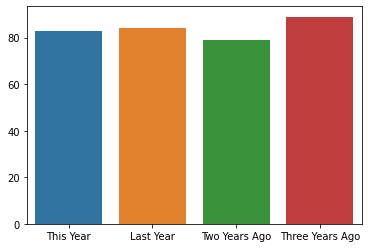

In [28]:
#Births over last few years
x = [underOne.sum(), oneToTwo.sum(), twoToThree.sum(), threeToFour.sum()]
y = ['This Year', 'Last Year', 'Two Years Ago', 'Three Years Ago']
print(x)
sns.barplot(x = y, y = x)

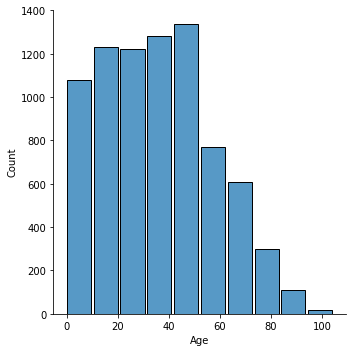

In [29]:
#Ages of the population
ages = sns.displot(censusData, x='Age', bins = 10, shrink = .9)
#Binwidth of 10 to make it easier to see whilst maintaining how easy it is to understand


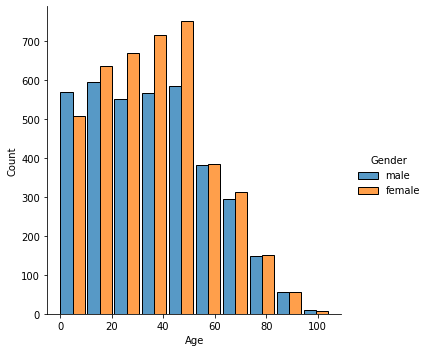

In [30]:
#Ages by Gender
sns.displot(censusData, x='Age', hue='Gender', bins = 10, shrink = .9, multiple = 'dodge')

<b>Marital Status</b>

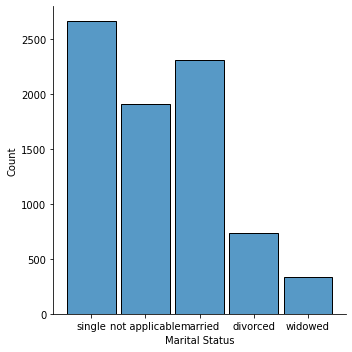

In [31]:
#Marital Status'
maritalStatus = sns.displot(censusData, x='Marital Status', shrink = .9)

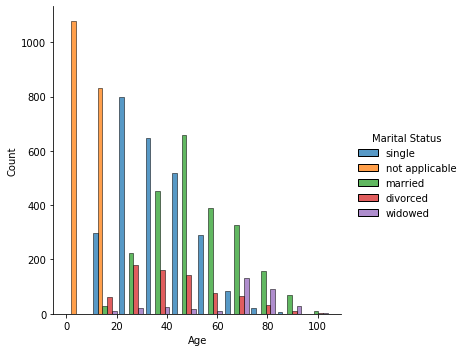

In [32]:
#Marital Status vs age
sns.displot(censusData, x = 'Age', hue = 'Marital Status', bins = 10, shrink = .9 , multiple = 'dodge')

<b>Religion</b>

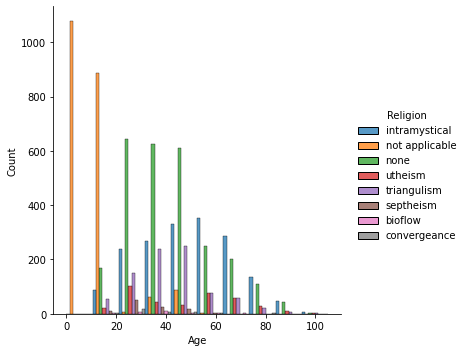

In [33]:
sns.displot(censusData, x = 'Age', hue = 'Religion', bins = 10, multiple = "dodge")

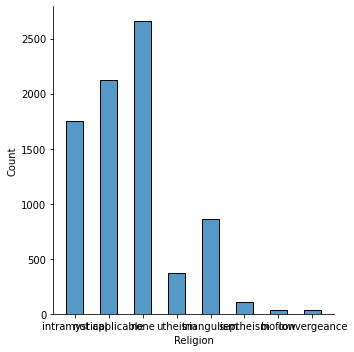

In [34]:
#amount of people per religion
sns.displot(censusData, x = 'Religion', shrink = .5)

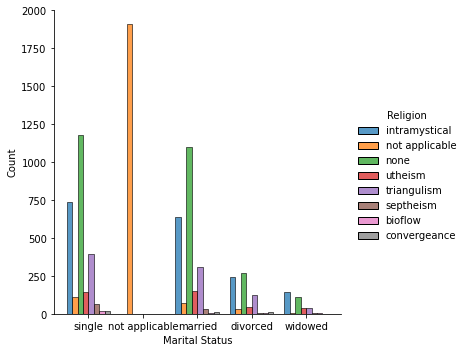

In [35]:
#Married pepole per religion
sns.displot(censusData, x = 'Marital Status', shrink = .8, hue = 'Religion', multiple = "dodge")

<b>Employment</b>

<AxesSubplot:>

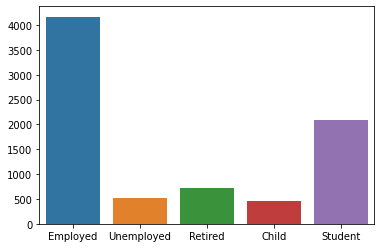

In [36]:
x = [employedCount, unemployedCount, retiredCount, childCount, studentCount]
y = ['Employed', 'Unemployed', 'Retired', 'Child', 'Student']
sns.barplot(x = y, y = x)